## Questão 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(30)

In [3]:
plt.style.use('../est.mplstyle')

**Espaço de estados**

In [4]:
S = np.arange(0, 6, 1)

**Matriz de Transição**

In [5]:
P = np.array([[0, 0, 0.1, 0.2, 0.7, 0],
              [0, 0, 0.1, 0.2, 0.4, 0.3],
              [0.3, 0.4, 0.3, 0, 0, 0],
              [0.1, 0.2, 0.4, 0.3, 0, 0],
              [0, 0.1, 0.2, 0.4, 0.3, 0],
              [0, 0, 0.1, 0.2, 0.3, 0.4]])

### Letra a)

In [6]:
def update_function(i, u, transition_matrix=P):
    state = np.digitize(u, transition_matrix.cumsum(axis=1)[i, :]).item()
    return state    

### Letra b)

In [7]:
def free_coupling(i, j, u):
    coupled_state = np.array([update_function(i, u), update_function(j, u)])
    return coupled_state

In [8]:
def simulate(n_runs=100, initial_state=(0, 5), coupling=free_coupling):
    chain_sample = np.zeros((n_runs, 2), dtype=np.int32)
    chain_sample[0] = initial_state
    
    state = initial_state
    for i in range(1, n_runs):
        u = np.random.random()
        state = coupling(*state, u)
        chain_sample[i] = state
    return chain_sample

In [9]:
chain_sample = simulate()

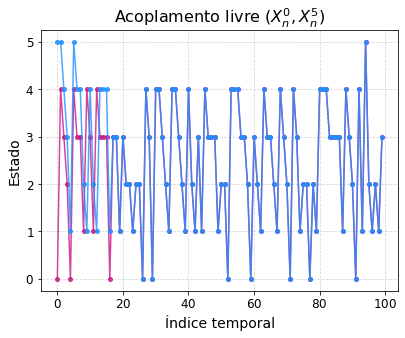

In [10]:
plt.plot(chain_sample[:, 0], '-o',color='mediumvioletred', markersize=4, alpha=0.8)
plt.plot(chain_sample[:, 1], '-o', color='dodgerblue', markersize=4, alpha=0.8)
plt.xlabel("Índice temporal")
plt.ylabel("Estado")
plt.title(r"Acoplamento livre $(X_{n}^0, X_{n}^5)$")
plt.ticklabel_format(axis='x', style='plain')
plt.grid(alpha=0.5, linestyle='--')
#plt.savefig('../figures/l2/free-coupling-full.pdf', bbox_inches='tight')
plt.show()

In [11]:
max_index = 25

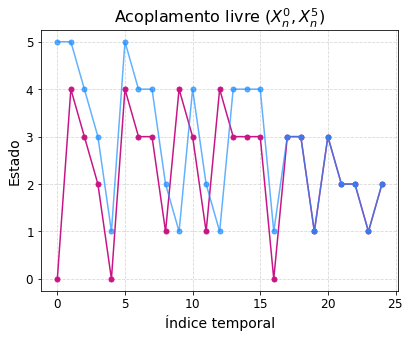

In [12]:
plt.plot(chain_sample[:max_index, 0], '-o', color='mediumvioletred', markersize=5, alpha=1)
plt.plot(chain_sample[:max_index, 1], '-o', color='dodgerblue', markersize=5, alpha=0.7)
plt.xlabel("Índice temporal")
plt.ylabel("Estado")
plt.title(r"Acoplamento livre $(X_{n}^0, X_{n}^5)$")
plt.ticklabel_format(axis='x', style='plain')
plt.grid(alpha=0.5, linestyle='--')
#plt.savefig('../figures/l2/free-coupling-crop.pdf', bbox_inches='tight')
plt.show()

### Letra c)

Sempre temos garantia da coalescência do acoplamento livre. Vamos estimar o valor esperado de $\tau^{0,5}$ pela média amostral dos tempos mínimos observados. 

In [13]:
def simulate_until_meeting(initial_state=(0, 5), coupling=free_coupling):
    chain_sample = []
    state = initial_state
    while state[0] != state[1]:
        u = np.random.random()
        state = coupling(*state, u)
        chain_sample.append(state)
    return np.array(chain_sample)

In [14]:
def meeting_times(n_chains=10**3):
    values = np.zeros(n_chains)
    for i in range(n_chains):
        chain = simulate_until_meeting()
        meeting_time = chain.shape[0]
        values[i] = meeting_time
    return values

In [15]:
def estimate_meeting_time(n_chains=10**3):
    values = meeting_times(n_chains)
    return values.mean()

In [16]:
def estimate_meeting_with_lacking_values(n_chains=10**3, n_runs=100):
    values = np.zeros(n_chains)
    discard = 0
    for i in range(n_chains):
        chain = simulate(n_runs=n_runs)
        meeting_time = (chain[:, 0] != chain[:, 1]).cumsum().max()
        if meeting_time == n_runs:
            discard += 1
        else:
            values[i] = meeting_time
    return values.sum()/(n_chains-discard)   

In [17]:
estimate_meeting_with_lacking_values()

7.552763819095477

In [18]:
estimate_meeting_time()

9.432

In [19]:
values = meeting_times()

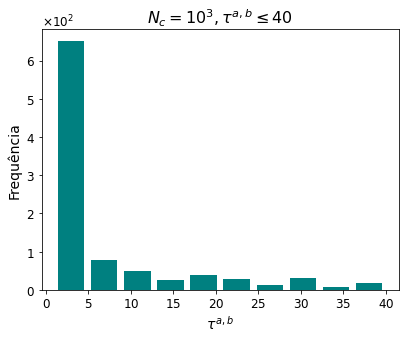

In [20]:
plt.hist(values[values <= 40], rwidth=0.8, color='teal')
plt.ticklabel_format(axis='x', style='plain')
plt.ylabel("Frequência")
plt.xlabel(r"$\tau^{a, b}$")
plt.title(r"$N_{c} = 10^3, \tau^{a, b} \leq 40$")
#plt.savefig("../figures/l2/meeting-time-hist-le40.pdf", bbox_inches='tight')
plt.show()